In [3]:
from geoimages import etl
from geoimages import visualize
from keras import models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2-Layer Convolutional Model Prediction

In [5]:
model_2L = models.load_model('../models/model_2L.h5')
model_2L.summary()

Model: "Conv2L"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 3)         0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 32, 32, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 30, 30, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0    

In [6]:
images = etl.Images()
images.images_path = '../images/predict/'
md = images.generate_image_metadata()
X, Y = images.images_to_x_y()
X_Norm = X/255.
classes = ['andesite', 'gneiss', 'marble', 'quartzite', 'rhyolite', 'schist']
img_keys = list(md['images'].keys())

rhyolite.AW80U.jpg


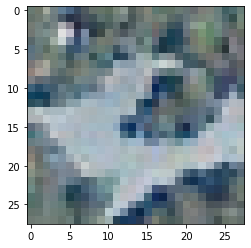

In [84]:
im_num = 30
candidate_path = md['images'][img_keys[0]]['root'] + md['images'][img_keys[im_num]]['file_name']
im = images.read_image(candidate_path)
plt.imshow(im)
print(md['images'][img_keys[im_num]]['file_name'])
candidate_class = md['images'][img_keys[im_num]]['file_name'].split('.')[0]

In [85]:
X_Predict = np.zeros((1,28,28,3))
X_Predict[0,:,:,:] = X_Norm[im_num,:,:,:] 
predicted_class = model_2L.predict(X_Predict)
clss = classes[np.argmax(predicted_class)]
print('Candidate class: ' + candidate_class)
print('Predicted class: ' + clss)

Candidate class: rhyolite
Predicted class: rhyolite
